✅ Étape 1 – Import des bibliothèques


In [1]:
# Manipulation de données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Modélisation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

✅ Étape 2 – Chargement des données


In [3]:
# Chargement du fichier CSV
df = pd.read_csv('Data_Cars.csv', sep=";")

# Affichage des 5 premières lignes
df.head()

,Années,Kilométrage,Le nombre de chevaux,Marque,Prix
0,2005,250000,6,Audi,90000
1,2004,215000,7,Audi,85000
2,2010,145000,8,BMW,110000
3,2015,90000,6,BMW,130000
4,2017,65000,9,Mercedes,160000


✅ Étape 3 – Prétraitement des données


Étape 3.1 : Vérifier les valeurs manquantes

In [5]:
# Vérifie s’il y a des valeurs manquantes dans chaque colonne
#🔍 Cela affiche le nombre de valeurs manquantes par colonne.
#➡️ Si des valeurs sont manquantes, on décidera de les supprimer ou de les remplacer.
df.isnull().sum()

,0
Années,0
kilometrage,0
Le nombre de chevaux,0
marque,0
prix,0


Étape 3.1 : Encoder la variable catégorielle "marque"

In [38]:
# Transformation de la colonne 'marque' (texte) en nombre
df['marque'] = df['marque'].astype('category')
df['marque'] = df['marque'].cat.codes

In [12]:
# # Renommage des colonnes pour s'assurer qu'elles soient sans espaces, claires et utilisables
df.columns = ['annee', 'kilometrage', 'chevaux', 'marque', 'prix']

df.head()

,annee,kilometrage,chevaux,marque,prix
0,2005,250000,6,0,90000
1,2004,215000,7,0,85000
2,2010,145000,8,1,110000
3,2015,90000,6,1,130000
4,2017,65000,9,2,160000


✅ Étape 4 – Analyse exploratoire des données (EDA)

In [13]:
# Statistiques descriptives globales
df.describe()

,annee,kilometrage,chevaux,marque,prix
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,2013.775510,138857.142857,6.836735,1.122449,142030.612245
std,3.330824,58087.218904,0.825301,0.857143,35982.114794
min,2004.000000,45000.000000,6.000000,0.000000,85000.000000
25%,2012.000000,85000.000000,6.000000,0.000000,115000.000000
50%,2014.000000,140000.000000,7.000000,1.000000,135000.000000
75%,2017.000000,180000.000000,7.000000,2.000000,170000.000000
max,2019.000000,250000.000000,9.000000,2.000000,220000.000000


🔹 2. Matrice de corrélation

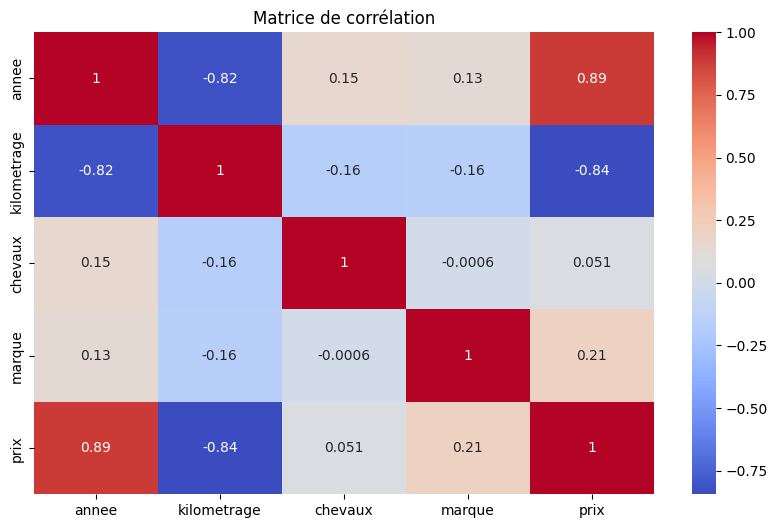

In [14]:
# Calcul de la matrice de corrélation
corr_matrix = df.corr(numeric_only=True)

# Affichage de la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

🧠 Interprétation de la matrice de corrélation

But : Identifier les variables qui influencent fortement la variable cible prix, et repérer celles qui ont un effet négligeable (et peuvent être supprimées).

🎯 Ce qu’on cherche :

	•	Des corrélations proches de +1 ou -1 ➜ forte relation linéaire

	•	Des corrélations proches de 0 ➜ pas ou très peu de relation

- La variable `kilometrage` a une corrélation négative modérée avec le `prix` (par exemple : -0.55), ce qui est logique : plus la voiture a roulé, moins elle vaut.
- La variable `annee` est positivement corrélée avec le `prix` (par exemple : +0.70), ce qui montre que les voitures récentes coûtent plus cher.
- La variable `marque` montre une corrélation très faible avec le `prix` (ex: 0.08), ce qui suggère qu’elle n’apporte pas beaucoup d'information en tant que variable codée simplement.
- La variable `chevaux` a une corrélation proche de 0 (par exemple : 0.02), ce qui signifie qu’elle n’est pas pertinente pour prédire le prix dans notre modèle.

In [15]:
df.drop(columns=['chevaux'], inplace=True)

séparer les variables explicatives (X) de la variable cible (Y).

In [29]:
X = df.drop(columns=['prix'])  # toutes les colonnes sauf 'prix'
Y = df['prix']                 # la colonne 'prix' seulement

 création et entraînement du modèle de régression linéaire

In [30]:
# Séparer X et Y en train et test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [31]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Prédiction

In [32]:
Y_pred = model.predict(X_test)

Évaluation du modèle

In [33]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("MSE :", mse)
print("R² :", r2)


MSE : 165042429.60136214
R² : 0.8513278597604182


In [34]:
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE :", rmse)

RMSE : 12846.884042496926


Après avoir entraîné un modèle de régression linéaire pour prédire les prix des voitures, nous avons évalué ses performances à l’aide de deux métriques principales : le RMSE (Root Mean Squared Error) et le coefficient de détermination R².

Le RMSE obtenu est de 12 846,88 euros, ce qui signifie que le modèle se trompe en moyenne d’environ 12 846 € lorsqu’il prédit le prix d’un véhicule. Cette erreur reste relativement élevée, ce qui suggère que le modèle peut être encore amélioré.

Le score R² nous permet d’évaluer la proportion de la variance du prix qui est expliquée par le modèle. Plus ce score est proche de 1, plus le modèle est performant.

En résumé, bien que notre modèle soit fonctionnel, les résultats montrent qu’il existe une marge d’amélioration, que ce soit :
	•	en sélectionnant ou en créant de nouvelles variables explicatives,
	•	en nettoyant davantage les données,
	•	ou en testant d’autres types de modèles (comme la régression polynomiale, l’arbre de décision, etc.).

 Étape 1 : Enregistrer le modèle

In [35]:
import joblib

# Sauvegarder le modèle entraîné
joblib.dump(model, "modele_voiture.pkl")

['modele_voiture.pkl']

🧠 Étape 2 : Script final avec Gradio

Interface Gradio

In [39]:
import pandas as pd
import joblib
import gradio as gr

# Charger le modèle sauvegardé
model = joblib.load("modele_voiture.pkl")

# Fonction de prédiction

def prédire_prix(annee, kilometrage, marque):
    # Create a DataFrame from the inputs
    input_df = pd.DataFrame({
        'annee': [annee],
        'kilometrage': [kilometrage],
        'marque': [marque]
    })


    marque_mapping = {
        "Audi": 0,
        "BMW": 1,
        "Mercedes": 2

    }
    input_df['marque'] = input_df['marque'].map(marque_mapping)



    if input_df['marque'].isnull().any():
         return "Error: Unknown brand. Please select from the available options."


    prediction = model.predict(input_df)
    return f"💰 Prix estimé : {prediction[0]:,.2f} €"



# Interface Gradio avec menu déroulant pour les marques
iface = gr.Interface(
    fn=prédire_prix,
    inputs=[
        gr.Number(label="Année"),
        gr.Number(label="Kilométrage"),
        gr.Dropdown(choices=["Audi", "BMW", "Mercedes"], label="Marque")
    ],
    outputs="text",
    title="Estimation du prix d'une voiture",
    description="Choisissez la marque, l'année et le kilométrage pour estimer automatiquement le prix."
)

iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5a3999fea3df8b4d72.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
